In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('customers.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


([<matplotlib.patches.Wedge at 0x15f784283b0>,
 [Text(-1.0265439893343442, 0.3952308666609052, 'no'),
  Text(1.0265440170874796, -0.39523079457691607, 'yes')],
 [Text(-0.5599330850914603, 0.21558047272413008, '88.3%'),
  Text(0.5599331002295342, -0.21558043340559055, '11.7%')])

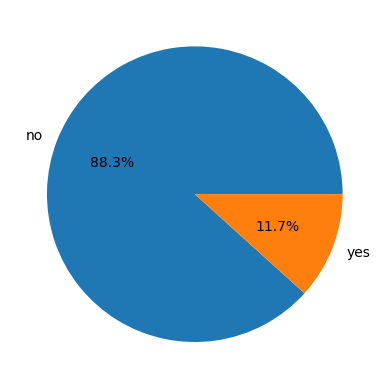

In [4]:
counts  = df['y'].value_counts()
plt.pie(counts.values,labels=counts.index,autopct='%1.1f%%')

In [5]:
from imblearn.over_sampling import RandomOverSampler

rand = RandomOverSampler(random_state=0) 

inputs_cols = df.drop('y',axis=1)
class_col = df['y']

inputs_cols_resample , class_col_resample = rand.fit_resample(inputs_cols,class_col)

df = pd.concat([inputs_cols_resample,class_col_resample],axis=1)


In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,63,blue-collar,married,secondary,no,180,no,no,cellular,15,jul,390,2,182,5,success,yes
79840,27,management,single,tertiary,no,20585,no,no,cellular,23,sep,299,1,100,1,success,yes
79841,36,technician,married,tertiary,no,202,no,no,cellular,29,jan,313,1,120,3,failure,yes
79842,36,management,married,tertiary,no,4069,no,no,cellular,21,nov,517,1,-1,0,unknown,yes


([<matplotlib.patches.Wedge at 0x15f7d7c37a0>,
 [Text(6.735557395310444e-17, 1.1, 'no'),
  Text(-2.0206672185931328e-16, -1.1, 'yes')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

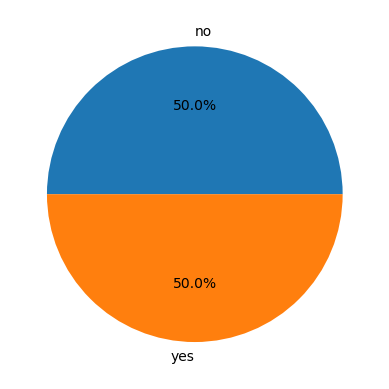

In [7]:
counts  = df['y'].value_counts()
plt.pie(counts.values,labels=counts.index,autopct='%1.1f%%')

In [8]:
counts

y
no     39922
yes    39922
Name: count, dtype: int64

In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

y = le.fit_transform(y)


In [34]:
y[:5]

array([0, 0, 0, 0, 0])

In [35]:
from  sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

# Select the column to encode
X_job = X[['job']]  # <- make it a DataFrame, not Series

# Create the ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['job'])],
    remainder='drop',  # drop other columns
    sparse_threshold=0  # optional, outputs dense array
)

# Fit and transform
X_job_encoded = ct.fit_transform(X_job)
print(X_job_encoded.shape)

(79844, 12)


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        79844 non-null  int64 
 1   job        79844 non-null  object
 2   marital    79844 non-null  object
 3   education  79844 non-null  object
 4   default    79844 non-null  object
 5   balance    79844 non-null  int64 
 6   housing    79844 non-null  object
 7   loan       79844 non-null  object
 8   contact    79844 non-null  object
 9   day        79844 non-null  int64 
 10  month      79844 non-null  object
 11  duration   79844 non-null  int64 
 12  campaign   79844 non-null  int64 
 13  pdays      79844 non-null  int64 
 14  previous   79844 non-null  int64 
 15  poutcome   79844 non-null  object
dtypes: int64(7), object(9)
memory usage: 9.7+ MB


In [37]:
X_cat = X.iloc[:,[1,2,3,4,6,7,8,10,15]]

In [38]:
X_cat.shape

(79844, 9)

In [39]:
# Select only categorical columns
X_cat = X.iloc[:, [1, 2, 3, 4, 6, 7, 8, 10, 15]]

# One-hot encode all categorical columns at once
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), X_cat.columns)],
    remainder='passthrough',
    sparse_threshold=0
)

X_encoded = ct.fit_transform(X_cat)

In [40]:
X_encoded.shape

(79844, 35)

In [41]:
# Get new feature names
encoded_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(X_cat.columns)
all_columns = list(encoded_feature_names)  # Since remainder='passthrough', these are all columns now

X_encoded_df = pd.DataFrame(X_encoded, columns=all_columns)

In [42]:
X_encoded_df.shape

(79844, 35)

In [43]:
X_num = X.iloc[:,[0,5,9,11,12,13,14]]
X = pd.concat([X_num.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)


In [44]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,63,180,15,390,2,182,5,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79840,27,20585,23,299,1,100,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79841,36,202,29,313,1,120,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79842,36,4069,21,517,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
from sklearn.model_selection import train_test_split 

X_train, X_test , y_train , y_test = train_test_split(X,y,train_size=.8,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train.shape

(63875, 42)

In [48]:
from keras.models import Sequential 
from keras.layers import Dense , Dropout 
from keras.losses import  BinaryCrossentropy 

model = Sequential () 

model.add(Dense(input_shape=(X_train.shape[1],),units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam',loss=BinaryCrossentropy(),metrics=['accuracy'])


model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))



Epoch 1/100


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1997/1997 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8336 - loss: 0.3767 - val_accuracy: 0.8738 - val_loss: 0.3099
Epoch 2/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8835 - loss: 0.2903 - val_accuracy: 0.8847 - val_loss: 0.2859
Epoch 3/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8960 - loss: 0.2641 - val_accuracy: 0.8917 - val_loss: 0.2690
Epoch 4/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9053 - loss: 0.2411 - val_accuracy: 0.8930 - val_loss: 0.2698
Epoch 5/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9150 - loss: 0.2225 - val_accuracy: 0.9076 - val_loss: 0.2439
Epoch 6/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9249 - loss: 0.1983 - val_accuracy: 0.9112 - val_loss: 0.2380
Epoch 7/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9318 - loss: 0.1820 - val_accuracy: 0.9161 - val_loss: 0.2220
Epoch 8/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9378 - loss: 0.1681 - val_

In [53]:
model = Sequential () 

model.add(Dense(input_shape=(X_train.shape[1],),units=128,activation='relu'))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam',loss=BinaryCrossentropy(),metrics=['accuracy'])


history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))


Epoch 1/100


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8029 - loss: 0.4305 - val_accuracy: 0.8629 - val_loss: 0.3292
Epoch 2/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8714 - loss: 0.3167 - val_accuracy: 0.8696 - val_loss: 0.3127
Epoch 3/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8773 - loss: 0.3008 - val_accuracy: 0.8796 - val_loss: 0.3008
Epoch 4/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8851 - loss: 0.2878 - val_accuracy: 0.8828 - val_loss: 0.2964
Epoch 5/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8876 - loss: 0.2823 - val_accuracy: 0.8853 - val_loss: 0.2858
Epoch 6/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8923 - loss: 0.2698 - val_accuracy: 0.8927 - val_loss: 0.2745
Epoch 7/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8972 - loss: 0.2622 - val_accuracy: 0.8901 - val_loss: 0.2787
Epoch 8/100
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9000 - loss: 0.2557 - val_

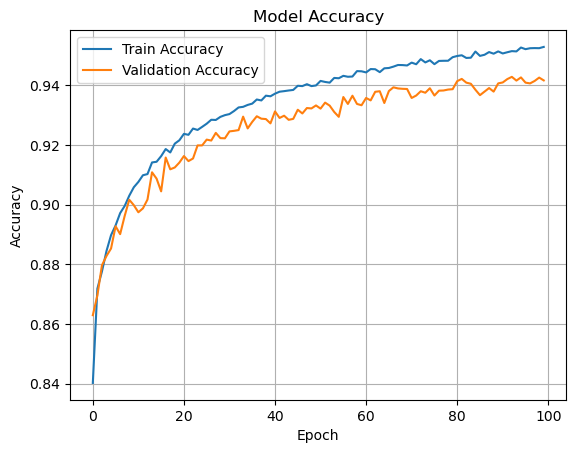

In [54]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
y_prplt.show()

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# Make predictions
y_pred = model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate metrics — correct order: y_true, y_pred
print("Accuracy   :", accuracy_score(y_test, y_pred))
print("Precision  :", precision_score(y_test, y_pred))
print("Recall     :", recall_score(y_test, y_pred))
print("F1 Score   :", f1_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
Accuracy   : 0.941636921535475
Precision  : 0.9068415051311288
Recall     : 0.9857461576598909
F1 Score   : 0.9446490081957477

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7901
           1       0.91      0.99      0.94      8068

    accuracy                           0.94     15969
   macro avg       0.95      0.94      0.94     15969
weighted avg       0.95      0.94      0.94     15969



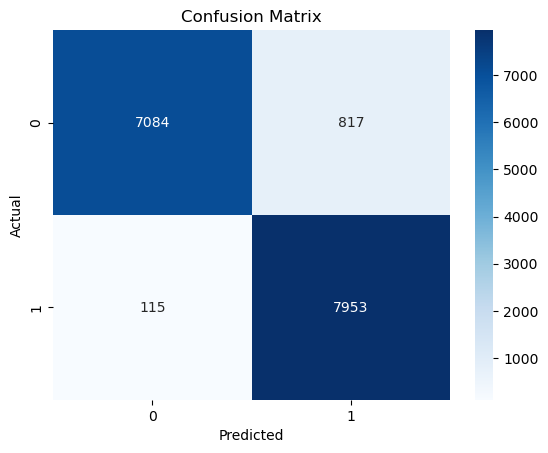

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()